# Module 1

# Section 8

## Multiple Regression and Model Validation - Introduction

This section covers:
* Multiple linear regression
* Dealing with categorical variables
* Multicollinearity of features
* Feature scaling and normalization
* Multiple linear regression in statsmodels
* Model fit and validation

## From simple to multiple linear regression

Below is a simple linear regression between seniority and monthly income.

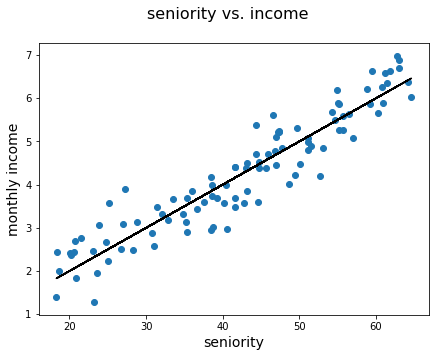

In [2]:
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)
sen = np.random.uniform(18, 65, 100)
income = np.random.normal((sen/10), 0.5)
sen = sen.reshape(-1,1)

fig = plt.figure(figsize=(7,5))
fig.suptitle('seniority vs. income', fontsize=16)
plt.scatter(sen, income)
plt.plot(sen, sen/10, c = "black")
plt.xlabel("seniority", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.show();

What if we wanted to consider other factors that drive income? We could create simple linear regression models for each of these factors. More interestingly, we can create a model where all these potential predictors of income serve as independent variables at once. 

In this example, our general linear model can be written as:

$\text{estimated monthly income} = slope * seniority + intercept $

Adding in years of education as a predictor, you can extend this model to:

$\text{estimated monthly income} = slope\_s * seniority + slope\_ed * years\_of\_education  + intercept $

<img src="images\multiple_reg.png" width="500">

It is important to note, however, is that for models with more than 2 predictors representing a multiple linear model becomes very difficult and even impossible! Still, it is done all the time

When thinking of lines and slopes statistically, slope parameters associated with a particular predictor $x_i$ are often denoted by $\beta_i$. Extending this example mathematically, you would write a multiple linear regression model as follows:

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

where $n$ is the number of predictors, $\beta_0$ is the intercept, and $\hat y$ is the so-called "fitted line" or the predicted value associated with the dependent variable.

## Dealing with Categorical Variables

Categorical variables contain values that do not represent a continuous number but rather refter to a category. They can be stored as objects/strings or int/float. 

To determine whether a variable is categorical, start by looking at the data type. Then you can try the .describe() function and the .info() function. Then make a scatter plot to visualize the data. There is a structural difference between continuous and categorical values in a scatter plot. Continuous variables produce a pretty homogenous "cloud" while categotical variables generate vertical lines for discrete values. It could also be helpful to view a histogram. 

### Transforming categorical variables

When you want to use categorical variables in regression models, they need to be transformed. There are two approaches to this:
- 1) Perform label encoding
- 2) Create dummy variables / one-hot-encoding

#### Label encoding
Let's illustrate label encoding and dummy creation with the following Pandas Series with 3 categories: "USA", "EU" and "ASIA".

In [5]:
import pandas as pd
origin = ["USA", "EU", "EU", "ASIA","USA", "EU", "EU", "ASIA", "ASIA", "USA"]
origin_series = pd.Series(origin)

In [4]:
cat_origin = origin_series.astype('category')
cat_origin

0     USA
1      EU
2      EU
3    ASIA
4     USA
5      EU
6      EU
7    ASIA
8    ASIA
9     USA
dtype: category
Categories (3, object): [ASIA, EU, USA]

Sometimes you'll want to represent your labels as numbers. This is called label encoding.

You'll perform label encoding in a way that numerical labels are always between 0 and (number_of_categories)-1. There are several ways to do this, one way is using `.cat.codes`

In [9]:
cat_origin.cat.codes

0    2
1    1
2    1
3    0
4    2
5    1
6    1
7    0
8    0
9    2
dtype: int8

Another way is to use scikit-learn's LabelEncoder:

In [10]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

origin_encoded = lb_make.fit_transform(cat_origin)

origin_encoded

array([2, 1, 1, 0, 2, 1, 1, 0, 0, 2])

Note that where `.cat.codes` can only be used on variables that are transformed using `.astype(category)`, this is not a requirement to use `LabelEncoder`.

#### Creating Dummy Variables

Another way to transform categorical variables is through using one-hot encoding or "dummy variables". The idea is to convert each category into a new column, and assign a 1 or 0 to the column. There are several libraries that support one-hot encoding, let's take a look at two:

In [11]:
pd.get_dummies(cat_origin)

,ASIA,EU,USA
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,0,0,1


See how the label name has become the column name! Another method is through using the LabelBinarizer in scikit-learn. 

In [15]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
origin_dummies = lb.fit_transform(cat_origin)
# you need to convert this back to a dataframe
origin_dum_df = pd.DataFrame(origin_dummies,columns=lb.classes_)

origin_dum_df

,ASIA,EU,USA
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,0,0,1


The advantage of using dummies is that, whatever algorithm you'll be using, your numerical values cannot be misinterpreted as being continuous. Going forward, it's important to know that for linear regression (and most other algorithms in scikit-learn), **one-hot encoding is required** when adding categorical variables in a regression model!

Here's an example of transforming a column through one-hot encoding:

In [18]:
## import numpy as np
import pandas as pd
data = pd.read_csv("auto-mpg.csv")
data['horsepower'].astype(str).astype(int) # don't worry about this for now
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [22]:
cyl_dummies = pd.get_dummies(data["cylinders"], prefix="cyl")
yr_dummies = pd.get_dummies(data["model year"], prefix="yr")
orig_dummies = pd.get_dummies(data["origin"], prefix="orig")

In [23]:
data = data.drop(["cylinders","model year","origin"], axis=1)

In [24]:
data = pd.concat([data, cyl_dummies, yr_dummies, orig_dummies], axis=1)
data.head()

,mpg,displacement,horsepower,weight,acceleration,car name,cyl_3,cyl_4,cyl_5,cyl_6,...,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,orig_1,orig_2,orig_3
0,18.0,307.0,130,3504,12.0,chevrolet chevelle malibu,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,15.0,350.0,165,3693,11.5,buick skylark 320,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,18.0,318.0,150,3436,11.0,plymouth satellite,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16.0,304.0,150,3433,12.0,amc rebel sst,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,17.0,302.0,140,3449,10.5,ford torino,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Dealing with Categorical Variables Lab

https://github.com/slmcamis/dsc-dealing-with-categorical-variables-lab-online-ds-ft-051319

## Multicollinearity of Features

### Possible negative impacts of multicollinearity

The main goal of regression analysis is to identify the relationship between each predictor and the outcome variable. The interpretation of a regression coefficient is that it represents the average change in the dependent variable for each 1 unit change in a predictor, assuming that all the other predictor variables are kept constant. 

For that reason, multicollinearity can cause problems. Correlation indicates that changes in one predictor are associated with changes in another one as well. It can cause the estimates of the coefficients to have big fluctuations as a result of small changes in the model, giving untrustworthy p-values associated with correlated predictors. 

### Identifying multicollinearity

In [30]:
## import numpy as np
import pandas as pd
data = pd.read_csv("auto-mpg.csv")
data['horsepower'].astype(str).astype(int) # don't worry about this for now
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


To understand the correlation structure of the predictors, you'll take a copy of the data but this time without the target variable (mpg) in it. It's also advisable to remove the "car name" column as keeping it in won't lead to meaningful results.

In [31]:
data_pred= data.iloc[:,1:8]
data_pred.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


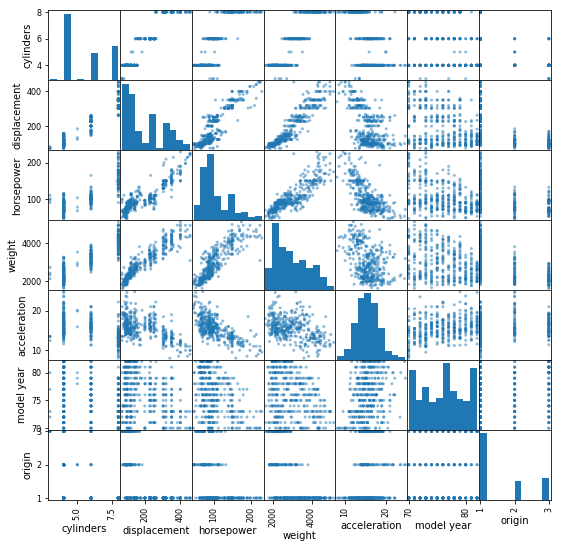

In [32]:
pd.plotting.scatter_matrix(data_pred,figsize  = [9, 9]);

This scatter matrix returns scatterplots for relationships between two predictors, and histograms for a single feature on the diagonal. We can get an idea of where there are linear relationships but for a clearer picture, we should look at the coorelation matrix instead. A correlation matrix returns pairwise correlations. Recall that correlations take a value between -1 and 1, -1 being a perfectly negative linear relationship, and +1 a perfectly positive linear relationship. Generally, a correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation.

In [33]:
data_pred.corr()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [34]:
abs(data_pred.corr()) > 0.75

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
cylinders,True,True,True,True,False,False,False
displacement,True,True,True,True,False,False,False
horsepower,True,True,True,True,False,False,False
weight,True,True,True,True,False,False,False
acceleration,False,False,False,False,True,False,False
model year,False,False,False,False,False,True,False
origin,False,False,False,False,False,False,True


It seems like the variables "cylinder", "displacement", "horsepower" and "weight" are all pretty highly correlated among each other. As such, you would typically remove three of them in order to remove collinear features. Again here, it would be nice to have easier visuals in case our predictor base grows (sometimes models have 100s of predictors!). A nice visualization of the correlation matrix is the heatmap. 

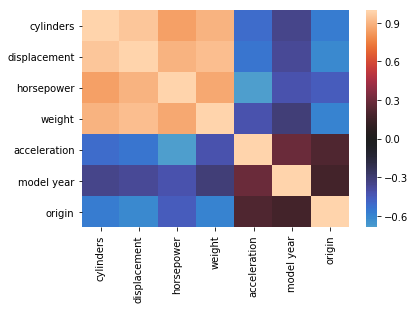

In [35]:
import seaborn as sns
sns.heatmap(data_pred.corr(), center=0);

## Multicollinearity of Features Lab

https://github.com/slmcamis/dsc-multicollinearity-of-features---lab-online-ds-ft-051319

## Log Transformations

Logarithmnic transformations are an effective technique to improve the performance of linear regression models. 

### Linear Regression Assumptions

Remember that linear regression operates under various assumptions including that the dependent variable can be decomposed into a linear combination of the independent features. Additionally, data should be homoscedastic and the residuals should follow a normal distribution.

One thing we briefly touched upon previously is the **distributions of the predictors**. You'll often find that having the data more normally distributed will benefit your model and model performance in general. So while normality of the predictors is not a mandatory assumption, having (approximately) normal featured may be helpful for your model!

### A Model Using the Raw Features

First, let's look at a model using raw inputs that are not approximately normal. Afterwards, you'll take a look at how to identify when you can **transform your inputs** (log transformations) and validate the improvement that they provide for the model.

In [36]:
data = pd.read_csv("auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [44]:
from statsmodels.formula.api import ols

In [38]:
outcome = 'mpg'
x_cols = ['displacement', 'horsepower', 'weight',
       'acceleration']
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Fri, 31 May 2019   Prob (F-statistic):          9.63e-102
Time:                        01:39:47   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2511      2.456     18.424      0.000      40.422      50.080
displacement    -0.0060      0.007     -0.894      0.372      -0.019       0.007
horsepower      -0.0436      0.017     -2.631      0.009      -0.076      -0.011
weight          -0.0053      0.001     -6.512      0.000      -0.007      -0.004
acceleration    -0.0231      0.126     -0.184      0.854      -0.270       0.224
==============================================================================
Omnibus:                       38.359   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.333
Skew:                           0.715   Prob(JB):                     7.13e-12
Kurtosis:                       4.049   Cond. No.                     3.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking Variable Distributions

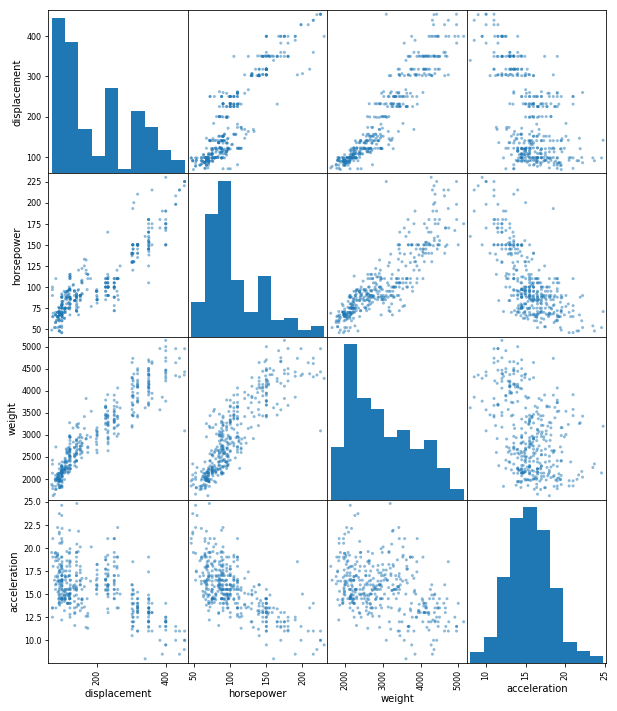

In [39]:
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

### Logarithmic Functions

One common option for transforming non-normal variavble distributions is to try applying a logarithmic function and observe its impact of the distribution. As a helpful math review, let's take a look at a logarithmic curve. (Also remember that you can't take the logarithm of zero nor a negative number.)

In [45]:
import numpy as np
import matplotlib.pyplot as plt

/Users/Alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


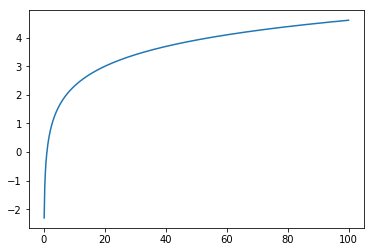

In [46]:
x = np.linspace(start=-100, stop=100, num=10**3)
y = np.log(x)
plt.plot(x, y)

### Transforming Non-Normal Features

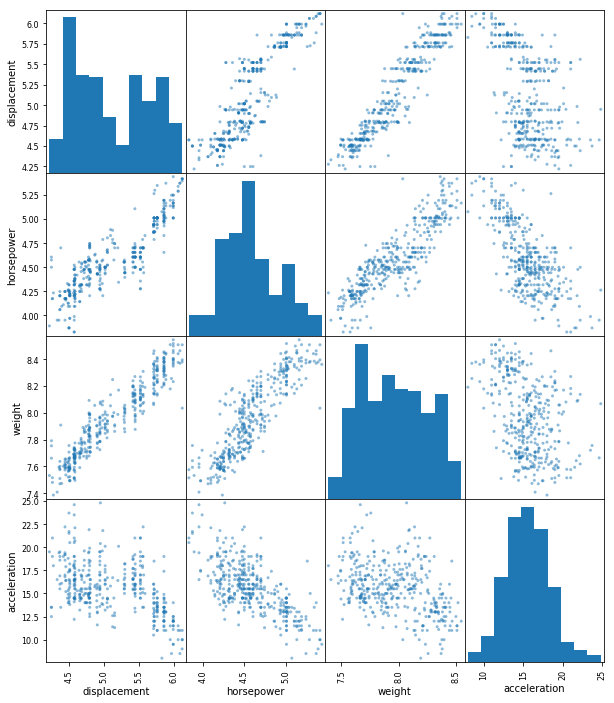

In [47]:
non_normal = ['displacement', 'horsepower', 'weight']
for feat in non_normal:
    data[feat] = data[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

### A Model After Transforming Non-Normal Features

In [48]:
outcome = 'mpg'
x_cols = ['displacement', 'horsepower', 'weight',
       'acceleration']
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     286.5
Date:                Fri, 31 May 2019   Prob (F-statistic):          2.98e-114
Time:                        01:44:25   Log-Likelihood:                -1091.4
No. Observations:                 392   AIC:                             2193.
Df Residuals:                     387   BIC:                             2213.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      154.5685     12.031     12.847      0.000     130.913     178.223
displacement    -3.2705      1.219     -2.684      0.008      -5.667      -0.874
horsepower     -11.0811      1.911     -5.800      0.000     -14.837      -7.325
weight          -7.2456      2.753     -2.632      0.009     -12.658      -1.834
acceleration    -0.3760      0.131     -2.876      0.004      -0.633      -0.119
==============================================================================
Omnibus:                       40.779   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.330
Skew:                           0.674   Prob(JB):                     1.07e-14
Kurtosis:                       4.456   Cond. No.                     1.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observations

While not dramatic, you can observe that simply by transforming non-normally distributed features using log transformations, we have increase our $R^2$ value of the model from 0.707 to 0.748. 

## Feature Scaling and Normalization

### Why is feature scaling and normalization important? 

**(Approximately) normal features may yield better results** 

As seen previously with log transformations. 

**The variety in feature scales**

Often, your dataset will contain features that largely vary in magnitudes. If you leave these magnitudes unchanged, coefficient sizes will largely fluctuate in magnitude as well. This can give the false impression that some variables are less important than others. It's not always an issue with regression models, but it *can* be an issue in more advanced machine learning models. This is because most machine learning algorithms use Euclidean distance between two data points in their computations.

>A good rule of thumb is, however, to check your features for normality, and while you're at it, scale your features so they have similar magnitudes, even for a "simple" model like linear regression.

### Popular transformations

### Log transformation

As seen in the previous lesson, a log transformation is a very useful tool when you have data that clearly does not follow a normal distribution. log transformation can help reducing skewness when you have skewed data, and can help reducing variability of data. 


### Min-max scaling

When performing min-max scaling, you can transform x to get the transformed $x'$ by using the formula:

$$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$$

This way of scaling brings values between 0 and 1

### Standardization

When 

$$x' = \dfrac{x - \bar x}{\sigma}$$

x' will have mean $\mu = 0$ and $\sigma = 1$

Note that standardization does not make data $more$ normal, it will just change the mean and the standard error!

### Mean normalization
When performing mean normalization, you use the following formula:
$$x' = \dfrac{x - \text{mean}(x)}{\max(x)-\min(x)}$$

The distribution will have values between -1 and 1, and a mean of 0.

### Unit vector transformation
 When performing unit vector transformations, you can create a new variable x' with a range [0,1]:
 
$$x'= \dfrac{x}{{||x||}}$$


Recall that the norm of x $||x||= \sqrt{(x_1^2+x_2^2+...+x_n^2)}$

### Additional research

scikit-learn provides automatic tools to scale features, see, among others, `MinMaxScaler`, `StandardScaler`
and `Normalizer`. Have a look at these built-in functions and some code examples here: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing!

To learn more about feature scaling in general, you can have a look at this blogpost: https://sebastianraschka.com/Articles/2014_about_feature_scaling.html (up until "bottom-up approaches".

## Feature Scaling and Normalization Lab

https://github.com/slmcamis/dsc-feature-scaling-and-normalization-lab-online-ds-ft-051319

## Multiple Linear Regression in Statsmodels

We will walk through a multiple linear regression model using both Statsmodels and Scikit-Learn. 

Remember that we introduced single linear regression before, which is known as ordinary least squares. It determines a line of best fit by minimizing the sum of squares of the errors between the models predictions and the actual data. In algebra and statistics classes, this is often limited to the simple 2 variable case of $y=mx+b$, but this process can be generalized to use multiple predictive variables.

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("auto-mpg.csv") 
data['horsepower'].astype(str).astype(int)

acc = data["acceleration"]
logdisp = np.log(data["displacement"])
loghorse = np.log(data["horsepower"])
logweight= np.log(data["weight"])

scaled_acc = (acc-min(acc))/(max(acc)-min(acc))	
scaled_disp = (logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))
scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
scaled_weight= (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))

data_fin = pd.DataFrame([])
data_fin["acc"]= scaled_acc
data_fin["disp"]= scaled_disp
data_fin["horse"] = scaled_horse
data_fin["weight"] = scaled_weight
cyl_dummies = pd.get_dummies(data["cylinders"], prefix="cyl")
yr_dummies = pd.get_dummies(data["model year"], prefix="yr")
orig_dummies = pd.get_dummies(data["origin"], prefix="orig")
mpg = data["mpg"]
data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)

In [2]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 26 columns):
mpg       392 non-null float64
acc       392 non-null float64
disp      392 non-null float64
horse     392 non-null float64
weight    392 non-null float64
cyl_3     392 non-null uint8
cyl_4     392 non-null uint8
cyl_5     392 non-null uint8
cyl_6     392 non-null uint8
cyl_8     392 non-null uint8
yr_70     392 non-null uint8
yr_71     392 non-null uint8
yr_72     392 non-null uint8
yr_73     392 non-null uint8
yr_74     392 non-null uint8
yr_75     392 non-null uint8
yr_76     392 non-null uint8
yr_77     392 non-null uint8
yr_78     392 non-null uint8
yr_79     392 non-null uint8
yr_80     392 non-null uint8
yr_81     392 non-null uint8
yr_82     392 non-null uint8
orig_1    392 non-null uint8
orig_2    392 non-null uint8
orig_3    392 non-null uint8
dtypes: float64(5), uint8(21)
memory usage: 23.4 KB


This was the data we had until now. As we want to focus on model interpretation and still don't want to have a massive model for now, let's only inlude "acc", "horse" and the three "orig" categories in our final data.

In [3]:
data_ols = pd.concat([mpg, scaled_acc, scaled_weight, orig_dummies], axis= 1)
data_ols.head()

,mpg,acceleration,weight,orig_1,orig_2,orig_3
0,18.0,0.238095,0.720986,1,0,0
1,15.0,0.208333,0.908047,1,0,0
2,18.0,0.178571,0.651205,1,0,0
3,16.0,0.238095,0.648095,1,0,0
4,17.0,0.148810,0.664652,1,0,0


### A linear model using Statsmodels

Now, let's use the statsmodels.api to run our ols on all our data. Just like for linear regression with a single predictor, you can use the formula $y \sim X$, where, with $n$ predictors, X is represented as $x_1+\ldots+x_n$.

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
formula = "mpg ~ acceleration+weight+orig_1+orig_2+orig_3"
model = ols(formula= formula, data=data_ols).fit()

Having to type out all the predictors isn't practical when you have many. Another better way than to type them all out is to seperate out the outcome variable "mpg" out of your data frame, and use the a `"+".join()` command on the predictors, as done below:

In [17]:
outcome = 'mpg'
predictors = data_ols.drop('mpg', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [7]:
model = ols(formula= formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     256.7
Date:                Fri, 31 May 2019   Prob (F-statistic):          1.86e-107
Time:                        02:35:33   Log-Likelihood:                -1107.2
No. Observations:                 392   AIC:                             2224.
Df Residuals:                     387   BIC:                             2244.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       16.1041      0.509     31.636      0.000      15.103      17.105
acceleration     5.0494      1.389      3.634      0.000       2.318       7.781
weight          -5.8764      0.282    -20.831      0.000      -6.431      -5.322
orig_1           4.6566      0.363     12.839      0.000       3.944       5.370
orig_2           5.0690      0.454     11.176      0.000       4.177       5.961
orig_3           6.3785      0.430     14.829      0.000       5.533       7.224
==============================================================================
Omnibus:                       37.427   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.989
Skew:                           0.648   Prob(JB):                     6.95e-13
Kurtosis:                       4.322   Cond. No.                     1.10e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.56e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Or even easier, simply use the `.OLS`-method from statsmodels.api. The advantage is that you don't have to create the summation string. Important to note, however, is that the intercept term is not included by default, so you have to make sure you manipulate your `predictors` dataframe so it includes a constant term. You can do this using `.add_constant`.

In [15]:
import statsmodels.api as sm
predictors_int = sm.add_constant(predictors)
model = sm.OLS(data['mpg'],predictors_int).fit()
model.summary()

/Users/Alex/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     256.7
Date:                Fri, 31 May 2019   Prob (F-statistic):          1.86e-107
Time:                        02:48:47   Log-Likelihood:                -1107.2
No. Observations:                 392   AIC:                             2224.
Df Residuals:                     387   BIC:                             2244.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.4826      0.789     28.504      0.000      20.932      24.033
acceleration     5.0494      1.389      3.634      0.000       2.318       7.781
weight          -5.8764      0.282    -20.831      0.000      -6.431      -5.322
orig_1          -1.7218      0.653     -2.638      0.009      -3.005      -0.438
orig_2          -1.3095      0.688     -1.903      0.058      -2.662       0.043
==============================================================================
Omnibus:                       37.427   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.989
Skew:                           0.648   Prob(JB):                     6.95e-13
Kurtosis:                       4.322   Cond. No.                         9.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretations

Just like for single multiple regression, the coefficients for our model should be interpreted as "how does Y change for each additional unit X"? Do note that the fact that we transformed X, interpretation can sometimes require a little more attention. In fact, as the model is built on the transformed X, the actual relationship is "how does Y change for each additional unit X'", where X' is the (log- and min-max, standardized,...) transformed data matrix.

### Linear regression using scikit learn

You can also repeat this process using Scikit-Learn. The code to do this can be found below. The Scikit-learn is generally known for its machine learning functionalities and generally very popular when it comes to building a clear data science workflow. It is also commonly used by data scientists for regression. The disadvantage of scikit learn compared to Statsmodels is that it doesn't have some statistical metrics like the p-values of the parameter estimates readily available. For a more ad-hoc comparison of Scikit-learn and statsmodels, you can read this blogpost: https://blog.thedataincubator.com/2017/11/scikit-learn-vs-statsmodels/.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
y = data_ols['mpg']
linreg = LinearRegression()
linreg.fit(predictors, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# coefficients
linreg.coef_

array([ 5.04941007, -5.87640551, -0.71140721, -0.29903267,  1.01043987])

In [12]:
# intercept
linreg.intercept_

21.47216428607541

### Why are the coefficients different in scikit learn vs Statsmodels?

You might have noticed that running our regression in Scikit-learn and Statsmodels returned (partially) different parameter estimates.

These models return equivalent results! 
We'll use an example to illustrate this. Remember that minmax-scaling was used on acceleration, and standardization on log(weight). 

Let's assume a particular observation with a value of 0.5 for both acceleration and weight after transformation, and let's assume that the origin of the car = `orig_3`. The predicted value for mpg for this particular value will then be equal to:
- 16.1041 + 5.0494 \* 0.5+ (-5.8764) \* 0.5 + 6.3785 = 22.0691 according to the Statsmodels 
- 21.4722 + 5.0494 \* 0.5+ (-5.8764) \* 0.5 + 1.0104 = 22.0691 according to the Scikit-learn model

The eventual result is the same. The extimates for the categorical variables are the same "up to a constant", the difference between the categorical variables, in this case 5.3681, is added in the intercept!

You can make sure to get the same result in both Statsmodels and Scikit-learn, by dropping out one of the `orig_`-levels. This way, you're essentially forcing the coefficient of this level to be equal to zero, and the intercepts and the other coefficients will be the same. 

This is how you do it in Scikit-learn:

In [18]:
predictors = predictors.drop("orig_3",axis=1)
linreg.fit(predictors, y)
print(linreg.coef_)
print(linreg.intercept_)

[ 5.04941007 -5.87640551 -1.72184708 -1.30947254]
22.48260416045568


And in Statsmodels:

In [19]:
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     256.7
Date:                Fri, 31 May 2019   Prob (F-statistic):          1.86e-107
Time:                        02:49:43   Log-Likelihood:                -1107.2
No. Observations:                 392   AIC:                             2224.
Df Residuals:                     387   BIC:                             2244.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.4826      0.789     28.504      0.000      20.932      24.033
acceleration     5.0494      1.389      3.634      0.000       2.318       7.781
weight          -5.8764      0.282    -20.831      0.000      -6.431      -5.322
orig_1          -1.7218      0.653     -2.638      0.009      -3.005      -0.438
orig_2          -1.3095      0.688     -1.903      0.058      -2.662       0.043
==============================================================================
Omnibus:                       37.427   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.989
Skew:                           0.648   Prob(JB):                     6.95e-13
Kurtosis:                       4.322   Cond. No.                         9.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Linear Regression in Statsmodels Lab

https://github.com/slmcamis/dsc-multiple-linear-regression-statsmodels-lab-online-ds-ft-051319

## Model Fit in Linear Regression

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     256.7
Date:                Fri, 31 May 2019   Prob (F-statistic):          1.86e-107
Time:                        03:01:15   Log-Likelihood:                -1107.2
No. Observations:                 392   AIC:                             2224.
Df Residuals:                     387   BIC:                             2244.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.4826      0.789     28.504      0.000      20.932      24.033
acceleration     5.0494      1.389      3.634      0.000       2.318       7.781
weight          -5.8764      0.282    -20.831      0.000      -6.431      -5.322
orig_1          -1.7218      0.653     -2.638      0.009      -3.005      -0.438
orig_2          -1.3095      0.688     -1.903      0.058      -2.662       0.043
==============================================================================
Omnibus:                       37.427   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.989
Skew:                           0.648   Prob(JB):                     6.95e-13
Kurtosis:                       4.322   Cond. No.                         9.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's discuss some key metrics in the light of our output:
- R-squared uses a baseline model which is the worst model. This baseline model does not make use of any independent variables to predict the value of dependent variable Y. Instead it uses the mean of the observed responses of dependent variable Y and always predicts this mean as the value of Y. The mathematical formula to calculate R-squared for a linear regression line is in terms of squared errors for the fitted model and the baseline model. In the formula below, $SS_{RES}$ is the residual sum of squared errors or our model, also known as $SSE$, which is the error between the real and predicted values. $SS_{TOT}$ is the difference between real and mean y values.

$$ R^2 = 1-\dfrac{SS_{RES}}{SS_{TOT}}= \dfrac{\sum_i y_i-\hat{y_i}}{\sum_i{Y_i-\bar{y_i}}}$$

-  The problem with $R^2$ is that, whichever predictor you **add** to your model which will make your model more complex, will increase your $R^2$ value. That is, the model tends to overfit if we only use $R^2$ as our model fitting criterion. This is why train test split is essential and why regularization techniques are used to refine more advanced regression models. Make sure to read [this blogpost](https://www.statisticshowto.datasciencecentral.com/adjusted-r2/) on the difference between the two to get a better sense to why use $R^2_{adj}$ !


## The parameter estimates and p-values

Just like with single linear regression, the parameters or coefficients we're calculating have a p-value or *significance* attached to them. The interpretation of the p-value for each parameter is exactly the same as for single multiple regression: 

> The p-value represents the probability that the coefficient is actually zero.

In the Statsmodels output, the p-value can be found in the column with name $P>|t|$. A popular threshold for the p-value is 0.05, where we $p<0.05$ denotes that a certain parameter is significant, and $p>0.05$ means that the parameter isn't significant.

The two columns right to the p-value column represent the bounds associated with the 95% confidence interval. What this means is that, after having run the model, we are 95% certain that our parameter value is within the bounds of this interval. When you chose a p-value cut-off of 0.05, there is an interesting relationship between the 95% confidence interval and the p-value: If the 95% confidence does not include 0, the p-value will be smaller than 0.05, and the parameter estimate will be significant.

### Which variables are most important when predicting the target?

Below, we'll describe 2 methods that can be used to select a submodel with the most appropriate features: stepwise selection on the one hand, and feature ranking with recursive feature elimination on the other hand.

#### Stepwise selection with p-values

In stepwise selection, you start with an empty model (which only includes the intercept), and each time, the variable that has an associated parameter estimate with the lowest p-value is added to the model (forward step). After adding each new variable in the model, the algorithm will look at the p-values of all the other parameter estimates which were added to the model previously, and remove them if the p-value exceeds a certain value (backward step). The algorithm stops when no variables can be added or removed given the threshold values.

For more information, it's worth having a look at the wikipedia page on stepwise regression.

Unfortunately, stepwise selection is not readily available a Python library just yet. This stackexchange post, however, presents the code to do a stepwise selection in statsmodels.

In [21]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [22]:
result = stepwise_selection(predictors, data_fin["mpg"], verbose = True)
print('resulting features:')
print(result)

Add  weight                         with p-value 1.16293e-107
Add  acceleration                   with p-value 0.000646572
resulting features:
['weight', 'acceleration']


/Users/Alex/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Feature ranking with recursive feature elimination

Scikit-learn also provides a few [functionalities for feature selection](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection). Their `Feature Ranking with Recursive Feature Elimination` selects the pre-specified $n$ most important features. See [here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) for more information on how the algorithm works. 

In [23]:
#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 2)
selector = selector.fit(predictors, data_fin["mpg"])

In [25]:
# Calling the `.support_` attribute tells you which variables are selected
selector.support_ 

array([ True,  True, False, False])

In [26]:
# Calling .ranking_ shows the ranking of the features, selected features are assigned rank 1
selector.ranking_

array([1, 1, 2, 3])

In [27]:
# By calling .estimator_ on the RFE object, you can get access to the parameter estimates through .coef_ and .intercept.
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 4.77870536 -6.26580459]
21.30081256419978


### Forward selection using adjusted R-squared

[This resource](https://planspace.org/20150423-forward_selection_with_statsmodels/) provides code for a forward selection procedure (much like stepwise selection, but without a backward pass), but this time looking at the adjusted-AAR-squared to make decisions on which variable to add in the mode.

## Model Fit in Linear Regression Lab

https://github.com/slmcamis/dsc-model-fit-linear-regression-lab-online-ds-ft-051319

## Regression Model Validation

In this section you'll learn why it's important to split your data in a train and a test set if you want to do proper performance evaluation.

### The need for train-test-split

#### Making predictions and evaluation

So far we've simply been fitting models to data, and evaluated our models calculating the errors between our $\hat y$ and our actual targets $y$, while these targets $y$ contributed in fitting the model.

The reason why we built the model in the first place, however, is because we want to predict the outcome for observations that are not necessarily in our data set now.

In order to get a good sense of how well your model will be doing on new instances, you'll have to perform a so-called "train-test-split". What you'll be doing here, is take a sample of the data that serves as input to "train" our model - fit a linear regression and compute the parameter estimates for our variables, and calculate how well our predictive performance is doing comparing the actual targets $y$ and the fitted $\hat y$ obtained by our model.

#### Underfitting and overfitting

An overfit model is not generalizable and will not hold to future cases. An underfit model does not make full use of the information available and produces weaker predictions than is feasible.

### How to evaluate?

To evaluate our model, you'll want to compare your predicted values, $\hat y$ with the actual value, $y$. The difference between the two values is referred to as the residuals. When using a train test split, you'll compare your residuals for both test set and training set:

$r_{i,train} = y_{i,train} - \hat y_{i,train}$ 

$r_{i,test} = y_{i,test} - \hat y_{i,test}$ 

To get a summarized measure over all the instances in the test set and training set, a popular metric is the (Root) Mean Squared Error:

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2}$

MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

Again, you can compute these for both the traing and the test set. A big difference in value between the test and training set (R)MSE is an indication of overfitting.

In [29]:
import pandas as pd
import numpy as np
data = pd.read_csv("auto-mpg.csv") 
data['horsepower'].astype(str).astype(int)

acc = data["acceleration"]
logdisp = np.log(data["displacement"])
loghorse = np.log(data["horsepower"])
logweight= np.log(data["weight"])

scaled_acc = (acc-min(acc))/(max(acc)-min(acc))	
scaled_disp = (logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))
scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
scaled_weight= (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))

data_fin = pd.DataFrame([])
data_fin["acc"]= scaled_acc
data_fin["disp"]= scaled_disp
data_fin["horse"] = scaled_horse
data_fin["weight"] = scaled_weight
cyl_dummies = pd.get_dummies(data["cylinders"], prefix="cyl")
yr_dummies = pd.get_dummies(data["model year"], prefix="yr")
orig_dummies = pd.get_dummies(data["origin"], prefix="orig")
mpg = data["mpg"]
data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)

In [30]:
data = pd.concat([mpg, scaled_acc, scaled_weight, orig_dummies], axis= 1)
y = data[["mpg"]]
X = data.drop(["mpg"], axis=1)

Scikit-learn has a very useful function train-test-split. The optional argument test_size makes it possible to choose the size of he test set and the training set.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

313 79 313 79


In [34]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [35]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [36]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: mpg    17.817768
dtype: float64
Test Mean Squarred Error: mpg    11.990179
dtype: float64


In [37]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 17.81776751491863
Test Mean Squarred Error: 11.990179068247915


Great, there does not seem to be a big difference between the train and test MSE!

### Additional resources

Great! By now, you have a lot of ingredients to build a pretty good (multiple) linear regression model. We'll add one more concept in the next section: the idea of cross-validation. But first, we strongly recommend to have a look at [this blogpost](https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606) to get a refresher on a lot of the concepts learned!

## Regression Model Validation Lab

https://github.com/slmcamis/dsc-regression-model-validation-lab-online-ds-ft-051319

## Introduction to Cross Validation

You learned about train-test-split before, but also noticed that running the model with a different split for train and test can lead to significantly different results. This is one of the many reasons why you'll want to consider cross-validation!

### The problem with train-test-split

When using train-test-split, random samples of the data are created for the training and the test set. The problem with this is that the training and test MSE strongly depend on how the training and test sets were created. Let's see how this happens in practice using the auto-mpg data.

In [38]:
data = pd.concat([mpg, scaled_acc, scaled_weight, orig_dummies], axis= 1)
y = data[["mpg"]]
X = data.drop(["mpg"], axis=1)

The code below repeats a train-test-split creation 20 times, using a test_size of 0.33. So what happens is, each time a new (random) train-test-split is created. See how training and testing MSEs swing around by just taking another sample!

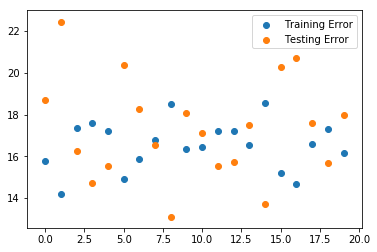

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt

num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

In order to deal with the issues that random sampling can introduce into interpreting the quality of our models, we'll use a more advanced technique called **K-Fold Cross Validation**.

### K-Fold Cross Validation

K-Fold Cross Validation expands on the idea of training and testing splits by splitting the entire dataset into {K} equal sections of data. We'll then iteratively train {K} linear regression models on the data, with each linear model using a different section of data as the testing set, and all other sections combined as the training set.

We can then average the individual results frome each of these linear models to get a Cross-Validation MSE. This will be closer to the model's actual MSE, since "noisy" results that are higher than average will cancel out the "noisy" results that are lower than average.

<img src='images/cross-val-graphic.png'>

You can easily do this in scikit-learn using `cross_val_score`. If you want the mean squared error as an output, you need to specify `scoring` and pass "neg_mean_squared_error". Note that this negates your mean squared error, so larger means better!

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

[Cross-validation documentation in Scikit-Learn](http://scikit-learn.org/stable/modules/cross_validation.html)

## Introduction to Cross Validation Lab

https://github.com/slmcamis/dsc-cross-validation-lab-online-ds-ft-051319

## Pickle

Pickle is an invaluable tool for saving objects. Think about the importance of being able to save data files to csv, or another format. For example, you start with a raw dataset which you may have downloaded from the web. Then you painstakingly take hours preprocessing the data, cleaning it, constructing features, aggregates and other views. In order to avoid having to rerun your entire process, you are apt to save the current final cleaned version of the dataset. Similarly, pickle allows you to save any object that is currently loaded into your python interpreter. Literally anything. You could save data stored in a dictionary, list or set as a pickle file. You can also save functions, or class instances as pickle files. Saving models is one of the important use cases of this. 

In [41]:
import pickle

In [42]:
# Writing objects to pickle

data_object = {
    'a': [1, 2.0, 3, 4+6j],
    'b': ("character string", b"byte string"),
    'c': {None, True, False}
}

In [43]:
with open('data.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data_object, f, pickle.HIGHEST_PROTOCOL)

In [44]:
# Importing objects from pickle files

with open('data.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data_object2 = pickle.load(f)
data_object2

{'a': [1, 2.0, 3, (4+6j)],
 'b': ('character string', b'byte string'),
 'c': {False, None, True}}

### Pickle with sci-kit learn

The example below is adapted from sci-kit learn's documentation on persistence. (See link below.) In the first part of this example, a rudimentary regression model is fit to a simple dataset.

The bottom code snippet is what is pertinent to the current pickle discussion. Here, just like our previous pickle examples, you can see how to save the model instance `reg` is saved to file. In other words, we have saved a trained model to disk. If you are using large production datasets where training can take a substantial amount of time and resources, then saving these model weights is essential. Similarly, you can see how easy it is to reload the saved model from file using `pickle.loads()`.

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [46]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)

In [47]:
import pickle
#Save
with open('regression_model.pickle', 'wb') as f:
    pickle.dump(reg, f)

#Load
with open('regression_model.pickle', 'rb') as file:
    reg2 = pickle.load(file)
reg2.predict(X)

array([ 6.,  8.,  9., 11.])

### Additional Resources

* [Pickle Documentation](https://docs.python.org/3/library/pickle.html)
* [sci-kit learn Persistence Documentation (using pickle)](https://scikit-learn.org/stable/modules/model_persistence.html)

## Data Privacy and Data Ethics

Data ethics and data privacy are integral to any data project. There are obvious cases such as protecting the privacy of individuals health records under HIPPA. There are also many gray areas surrounding what constitutes personally identifiable information (PII) which occur throughout many industries including advertising, finance, and consumer goods. You may have noticed that starting around the summer of 2018, you started receiving privacy policy notices on many websites asking you to accept the use of cookies. This was a result of Europe's GDPR legislation. You are also probably aware of the Cambridge Analytica debacle in the 2016 United States presidential election. As a data practitioner, it is your responsibility to uphold data ethics in a fast-changing environment.

### Examples

#### Data Breaches

If the data you are handling is valuable, then security should be a primary concern. Data breaches are all too common and often, such leaks of sensitive information could have been avoided if businesses and organizations followed standard security protocols. While there are thousands of said cases, two of the biggest breaches which have caught the public's attention include Cambridge Analytica's misuse of facebook data to influence political elections, and Equifax's leaking of roughly 100 million individuals social security numbers and credit scores. 

#### Identifying PII

PII stands for personally identifiable information. While some cases such as one's social security number and medical records are clear examples of PII, other pieces of data may or may not qualify as PII depending on the jurisdiction. In the United States for example, there are two federal regulations: Health Insurance Portability and Accountability Act (HIPAA), and the Privacy Act of 1974. While in theory these acts  aim to protect the use, collection and maintenance of personal data, the scope of what constitutes PII and the subsequent regulations surrounding handling and using said data is generally antiquated. For example, a user's IP address has been categorized as non-PII by in several U.S. courts despite it being a unique identifier to most individual's home internet connection. This was further eroded by the rollback of net neutrality laws by the FCC and Chairman Ajit Pai in mid 2018. Aside from federal jurisdiction, several states, most notably California have their own data protection laws to the benefit and protection of users and consumers.

#### GDPR

GDPR stands for the general data protection regulation. It was passed on April 14th 2016 by the European Union and went into effect on May 25th 2018. GDPR protects the data rights of all European citizens and is an example of how legislation will have to change and adapt to the online digital era of the 21st century. GDPR has implemented more widespread regulations surrounding what constitutes PII and has set fine structures for up to 4% of a companies revenue.

#### Data Best Practices

There are two primary practices that you should practice when dealing with PII and other sensitive data. The first is to encrypt sensitive data. When in doubt, encrypt. Secondly, ask yourself what level of information you really need. Large organizations will always include data cleaning teams which will first scrub sensitive data such as names and addresses before passing said data off to analysts and others to mine. Ultimately, any well-thought strategy will include multiple layers, safeguards and other measures to ensure data is safe and secure.


#### Algorithm Bias

People often trust algorithms and their output based on measurements such as "this algorithm is 99.9% accuracy". However, it should also be noted, that while algorithms such as linear regression are mathematically sound and powerful tools, the models are simply reflections of the data that is fed in. For example, logistic regression and other algorithms are used to inform a wide range of decisions including whether to provide someone with a loan, the degree of criminal sentencing, or whether to hire an individual for a job. (Do a quick search online for algorithm bias, or check out some of the articles below.) In all of these scenarios, it is again important to remember that the algorithm is simply reflective of the underlying data itself. If an algorithm is trained on a dataset where African Americans have had disproportionate criminal prosecution, the algorithm will continue to perpetuate these racial injustices. Similarly, algorithms trained on data reflecting a gender pay-gap will also continue to promote this bias. With this, substantial thought and analysis regarding problem set up and the resulting model is incredibly important.

Below is a handful of resources providing further information regarding some of the topics discussed here.

* [Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)

* [Amazon’s Gender-Biased Algorithm Is Not Alone](https://www.bloomberg.com/opinion/articles/2018-10-16/amazon-s-gender-biased-algorithm-is-not-alone)
* [The software that runs our lives can be bigoted and unfair. But we can fix it](https://www.bostonglobe.com/business/2017/12/21/the-software-that-runs-our-lives-can-bigoted-and-unfair-but-can-fix/RK4xG4gYxcVNVTIubeC1JI/story.html)

* [Why artificial intelligence is far too human](https://www.bostonglobe.com/ideas/2017/07/07/why-artificial-intelligence-far-too-human/jvG77QR5xPbpwBL2ApAFAN/story.html)

* [Can Computers Be Racist? The Human-Like Bias Of Algorithms](https://www.npr.org/2016/03/14/470427605/can-computers-be-racist-the-human-like-bias-of-algorithms)

### Gray Areas and Forward Thinking

Aside from overtly illegal practices according to current legislation, data privacy and ethics calls into question a myriad of various thought experiments. For example, should IP addresses or cookies be considered PII? How should security camera footage be handled? What about vehicles such as google street view cars which are capturing video and pictures of public places? Some companies are now even taking pictures of license plates to track car movements. Should they be allowed to maintain massive databases of said information? What regulations should be put on these and other potentially sensitive datasets?  
  
All of these examples question where and when limits should be put on data. Science fiction stories such as 1984, are much more accurate then one might expect. Moreover, injustices and questionable practices still abound. For example, despite public outcry at debuacles like Cambridge Analytica, many companies still exist with nearly identical practices such as [Applecart](https://web.archive.org/web/20160305010738/http://applecart.co/) in New York City, which collects and sells user data to the Republican party, amongst others. 

### [Fix it Already!](https://www.eff.org/deeplinks/2019/02/announcing-fix-it-already)

          
In staying current, you should also identify some news sources to stay up to date on tech trends.  
One great resource is the [Electronic Frontier Foundation (EFF)](https://www.eff.org/).  
  
EFF recently put together an article called Fix it Already, outlining fixable mishaps by technology companies that continue to be ignored. Take a look at the article [here](https://www.eff.org/deeplinks/2019/02/announcing-fix-it-already) and get involved to put pressure on these organizations and your representatives to shape up. Here's a quick preview of their list:  
  

* Android should let users <a href="https://fixitalready.eff.org/android">deny and revoke apps' Internet permissions</a>.</span></li>
<li><span>Apple should let users <a href="https://fixitalready.eff.org/apple">encrypt their iCloud backups</a>.</span></li>
<li><span>Facebook should <a href="https://fixitalready.eff.org/facebook">leave your phone number where you put it</a>.</span></li>
<li><span>Slack should give <a href="https://fixitalready.eff.org/slack">free workspace administrators control over data retention</a>.</span></li>
<li><span>Twitter should <a href="https://fixitalready.eff.org/twitter">end-to-end encrypt direct messages</a>.</span></li>
<li><span>Venmo should let users <a href="https://fixitalready.eff.org/venmo">hide their friends lists</a>.</span></li>
<li><span>Verizon should <a href="https://fixitalready.eff.org/verizon">stop pre-installing spyware on its users’ phones</a>.</span></li>
<li><span>WhatsApp should <a href="https://fixitalready.eff.org/whatsapp">get your consent before you’re added to a group</a>.</span></li>
<li><span>Windows 10 should let users <a href="https://fixitalready.eff.org/win10">keep their disk encryption keys to themselves</a>.</span></li>


### Disclaimer

As a final note, it should also be noted that the nature of online data can also include offensive or inappropriate data at times. For example, if acquiring data from an API such as twitter, there is potential to encounter lude or offensive material. While many of these services will eventually screen out and remove particularly egregious cases, plenty of trolls still exist.

### Additional Resources

There's a multitude of resources to get involved with data privacy and ethics, but here's a few to get you started.

* [Electronic Frontier Foundation](https://www.eff.org/)
* [GDPR](https://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32016R0679&from=EN)
* [HIPPA](https://www.hhs.gov/hipaa/for-professionals/index.html)
* [Data Detox](https://datadetox.myshadow.org/en/home)